# 案例1：海量文件自动化归档

In [5]:
# 自动生成1000个Excel文档
import os
import shutil
from datetime import datetime, timedelta


cur_time = datetime.now()
cur_time_str = cur_time.strftime("%Y%m%d%H")

print(cur_time_str)
print(os.getcwd())
src_file = os.path.abspath("./record/demo.xlsx")
for i in range(1000):
    prefix_datetime = cur_time - timedelta(hours=i)
    prefix_str = prefix_datetime.strftime("%Y%m%d%H")
    shutil.copy(src_file, "./record/"+prefix_str+".xlsx")

2020072320
/Users/evenyan/Documents/python_basic_baiku/baiku_demo


In [21]:
import os
import shutil


target_path = r"./record"
file_list =  os.listdir(target_path)

day_set = set([file[:8] for file in file_list])

print(day_set)
for day in day_set:
    dir_name = os.path.join(r"./data", str(day))
    try:
        os.mkdir(dir_name)
    except Exception as e:
        pass
    

for file in file_list:
    abs_path = os.path.join(target_path, file)
    if file[:8] in day_set:
        shutil.copy(abs_path, os.path.join(r"./data", file[:8]))

{'20200711', '20200608', '20200610', '20200602', '20200624', '20200709', '20200603', '20200627', '20200613', '20200703', '20200606', '20200604', '20200710', '20200607', '20200704', '20200615', '20200618', '20200614', '20200621', '20200708', '20200722', '20200611', '20200628', '20200718', '20200605', '20200601', '20200706', '20200713', '20200629', '20200719', '20200716', '20200622', '20200723', '20200626', '20200715', '20200717', '20200616', '20200612', '20200705', '20200623', '20200619', '20200720', '20200617', '20200712', '20200701', '20200707', '20200630', '20200620', '20200721', '20200714', '20200702', '20200609', '20200625'}


# 案例2：自动化邮件

{'天猫国际进口超市': 15000, '天猫超市': 8500, '欧莱雅男士官方旗舰店': 4991, '清泠': 1789, '瑞驰化妆品专营店': 1201, '欧莱雅美洁金信专卖店': 1187, '欧莱雅恒骊祥专卖店': 1049, 'loreal欧莱雅欧美斯专卖店': 852, '欧莱雅官方旗舰店': 593, '怡然居化妆品批发': 228, '欧莱雅美发官方旗舰店': 25}


/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22825 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 36827 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21475 missing from current font.
  font.set_

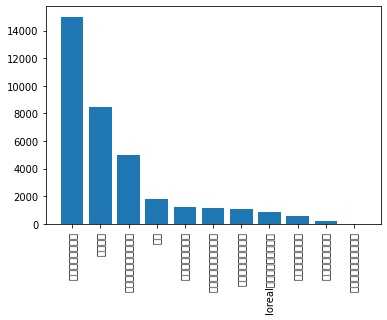

True

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


pd = pd.read_csv("taobao_sale.csv")

pd.dropna(inplace=True)
pd['商品销量'] = pd['商品销量'].str.replace("人付款", "")
pd['商品销量'] = pd['商品销量'].str.replace("+", "")
x = pd["店铺名称"]
y = pd['商品销量'].tolist()
new_y = []


for i in y:
    if "万" in i:
        new_y.append(int(float(i[:-1])*10000))
    else:
        new_y.append(int(i))

        
good_info = dict(zip(x, new_y))
good_info =dict(sorted(good_info.items(), key=lambda x:x[-1], reverse=True))
print(good_info)

plt.xticks(rotation=90)


plt.bar(good_info.keys(), good_info.values())

import os
filename = "result1.png"
plt.savefig(os.path.join("./images", filename), bbox_inches = 'tight')
# 绘制图表
plt.show()

import time

time.sleep(3)


import zmail

server = zmail.server("XXX@qq.com", "XXXX")

server.send_mail(["XXXX@qq.com"], {"subject": "测试", "content_html":"<html><table><tr><th style='color:red'>销量Top10</th></tr></table><div><img src='https://course-public-resources-1252758970.cos.ap-chengdu.myqcloud.com/%E5%AE%9E%E6%88%98%E8%AF%BE/%E6%B5%8B%E8%AF%95/result1.png'></div><p>Best Wishes!</p></html>"}, cc=["1014934663@qq.com"])



# 案例3：批量采集淘宝商品信息

In [10]:
# 所有商品：//div[@data-index][position()>1]
# 商品标题：//div[@data-index][position()>1]/div[2]/div[2]/a
# 商品价格：//div[@data-index][position()>1]//div[@class='price g_price g_price-highlight']
# 商品销量：//div[@data-index][position()>1]//div[@class='deal-cnt']
# 店铺名称：//div[@data-index][position()>1]//div[@class='shop']//span[2]/text()
# 店铺地址：//div[@data-index][position()>1]//div[@class='location']/text()

# 案例3：毫秒级打开10G大表格文件

In [24]:
%%timeit

import pandas as pd

df = pd.read_csv(r'/Users/evenyan/Documents/data.csv', iterator=True)



751 µs ± 78.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
%%timeit

import pandas as pd

df = pd.read_csv(r'/Users/evenyan/Documents/data.csv', iterator=True)
df.get_chunk(2)

4.6 ms ± 717 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
import pandas as pd
df = pd.read_csv(r'/Users/evenyan/Documents/data.csv', iterator=True)
df.get_chunk(2)

,0,000001.SZ,20200708,15.23,16.0,15.23.1,15.76,15.48,0.28,1.8088,2631339.16,4095447.757
0,1,000001.SZ,20200707,16.3,16.63,15.03,15.48,15.68,-0.20,-1.2755,3964427.47,6267919.683
1,2,000001.SZ,20200706,14.6,15.68,14.59,15.68,14.25,1.43,10.0351,4711460.78,7168653.356


# 案例4：词云制作

生成词云文件：output7-chinamap.png


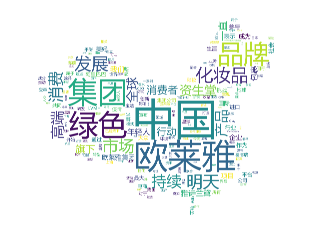

In [26]:
import os

import jieba
import wordcloud
import matplotlib.pyplot as plt

# 导入imageio库中的imread函数，并用这个函数读取本地图片，作为词云形状图片
import imageio


BASE_DIR = "./demo_word_cloud"


def gen_word_cloud(img_path, txt_path):
    mk = imageio.imread(img_path)
    w = wordcloud.WordCloud(mask=mk)

    # 构建并配置词云对象w，注意要加scale参数，提高清晰度
    w = wordcloud.WordCloud(width=1000,
                            height=700,
                            background_color='white',
                            font_path='MSYH.ttc',
                            mask=mk,
                            scale=15,
                            # 词语不重复出现
                            collocations=False)

    # 对来自外部文件的文本进行中文分词，得到string
    with open(txt_path, encoding='utf-8') as f:
        txt = f.read()
    # txtlist = jieba.lcut(txt)
    txtlist = list(jieba.cut(txt, cut_all=False, HMM=True))
    string_list = " ".join(txtlist)

    # 将string变量传入w的generate()方法，给词云输入文字
    w.generate(string_list)

    # 将词云图片导出到当前文件夹
    w.to_file('output7-chinamap.png')
    print("生成词云文件：output7-chinamap.png")
    plt.imshow(w)
    plt.axis("off")
    plt.show()

    

def main():
    filename = "./news.txt"
    img_path = os.path.join(BASE_DIR, "chinamap.png")
    text_path = os.path.join(BASE_DIR, filename)
    gen_word_cloud(img_path, text_path)
    

main()


# 案例5：数据分析全流程（从数据清洗到数据建模）

In [28]:
import pandas as pd


data = pd.read_excel("./客户信息及取消订单情况.xlsx")
data.info()
data.describe()

data['收入'].fillna(data['收入'].mean(), inplace=True)
data['年龄'].fillna(data['年龄'].mean(), inplace=True)
data['性别'].fillna(data['性别'].mean(), inplace=True)
data['性别'] = data['性别'].astype(int)


features = data[['收入', '年龄', '性别', '花呗额度', '取消订单次数']]
labels = data['是否取消订单']
print(features)
print(labels)
data.info()


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split(features, labels)

clf = DecisionTreeClassifier(max_depth=4)

clf.fit(train_X, train_y)

clf.predict(test_X)

clf.score(test_X, test_y)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   收入      994 non-null    float64
 1   年龄      999 non-null    float64
 2   性别      992 non-null    float64
 3   花呗额度    1000 non-null   int64  
 4   取消订单次数  1000 non-null   int64  
 5   是否取消订单  1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB
            收入         年龄  性别   花呗额度  取消订单次数
0     503999.0  46.000000   1      0       1
1     452766.0  36.000000   0  13583       0
2     100000.0  33.000000   1      0       1
3     100000.0  36.924925   0      0       1
4     258000.0  35.000000   1      0       0
..         ...        ...  ..    ...     ...
995   510666.0  44.000000   1   5000       0
996   490000.0  40.000000   0      0       0
997   333333.0  44.000000   1  10000       0
998   480000.0  38.000000   1      0       0
999  1500000.0  42.000000   0  91040       1

[1000 r

0.844

In [29]:
import graphviz
from sklearn.tree import export_graphviz
# dot_data = export_graphviz(clf, out_file=None)
# graph = graphviz.Source(dot_data)
# graph.render("fin")


with open("./clf.dot", 'w', encoding='utf-8') as f:
    f = export_graphviz(clf, feature_names=['收入', '年龄', '性别', '花呗额度', '取消订单次数'], out_file=f)
    

In [30]:
!dot -Tpdf clf.dot -o treeone.pdf